In [4]:
import Pseudo_Noise_Time_Domain as pn
import numpy as np
import matplotlib.pyplot as plt

In [30]:
N_tones = 128
Depth = -10
Qrs, Qcs, f_res, t, f, V_wave_in, V_wave_out = pn.Gen_Fake_Comb(
    P_dBm = -70., f_start = 2e9, f_stop = 4e9, N_Tones = N_tones, 
    separation_scatter = 0, BW = 100e3,BW_scatter = 0, 
    Depth = Depth,Depth_Scatter = 0, T = 0.0001)

In [ ]:
%matplotlib inline
comb_fft = np.fft.fft(V_wave_out)
comb = np.abs(comb_fft[:len(comb_fft)//2])
plt.loglog(f[:len(comb_fft)//2],comb)
plt.xlim(1e9,5e9)

/usr/local/lib/python3.6/dist-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


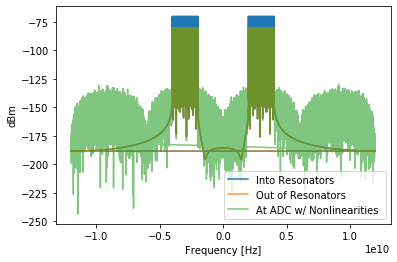

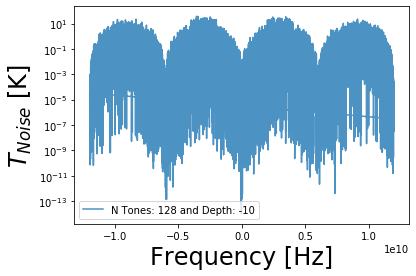

In [3]:
%matplotlib  inline
outdict = pn.Calc_Non_Linearities(V_wave_in,V_wave_out,t,f,
                                 fres = f_res,
                                 Gain = 40, IIP3 = -30, 
                                 plot_all = True,
                                 plot_noise_temp = True, 
                                 label = f'N Tones: {N_tones} and Depth: {Depth}',
                                 alpha = 0.8, fig_num = 2)

(0, 6000000000.0)

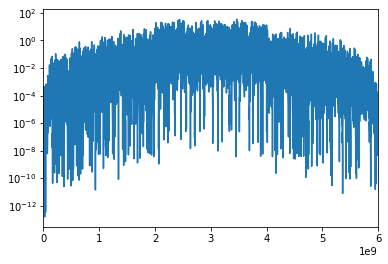

In [4]:
%matplotlib inline
outdict['ADC'].keys()
f_plot = outdict['ADC']['f_WperHz']
T_plot = outdict['ADC']['K']
f_plot = f_plot[:len(f_plot)//2]
T_plot = T_plot[:len(T_plot)//2]
plt.semilogy(f_plot,T_plot)
plt.xlim(0,6e9)
#plt.ylim(1e-4,500)

-0.0615899111784068
0.13337243920747768


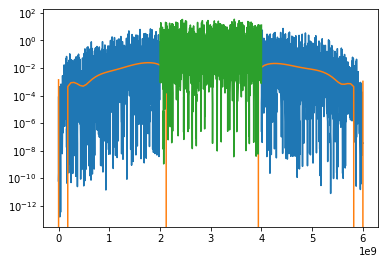

In [8]:
fplot2 = f_plot[np.where((f_plot < 2e9) | (f_plot > 4e9+100000) & (f_plot <6e9))[0]]
Tplot2 = T_plot[np.where((f_plot < 2e9) | (f_plot > 4e9+100000) &(f_plot <6e9))[0]]
fplot3 = f_plot[np.where((f_plot > 2e9) & (f_plot < 4e9+100000))[0]]
Tplot3 = T_plot[np.where((f_plot > 2e9) & (f_plot < 4e9+100000))[0]]
plt.semilogy(fplot2,Tplot2)
fit = np.polyfit(fplot2,Tplot2,14)
f_fit = np.linspace(0,6e9,100)
plt.plot(f_fit,np.poly1d(fit)(f_fit))
print(np.mean(np.poly1d(fit)(f_res)))
plt.plot(fplot3,Tplot3)
print(np.mean(Tplot3))

In [ ]:
#200, -10dB dips, 2-6GHz, -70dBm drive, -30 IIP3, 40dB Gain 
#Mean T = 1.38K

#1000, -10dB dips, 2-6GHz, -70dBm drive, -30 IIP3, 40dB Gain 
#Mean T = 140.22K

#2000, -10dB dips, 2-6GHz, -70dBm drive, -30 IIP3, 40dB Gain 
#Mean T = 447.94

Generating Comb for 64 tones
Calc nonlinearities for 64 tones
Noise from min for 64 tones: 0.03290396266574043 K
Generating Comb for 128 tones
Calc nonlinearities for 128 tones
Noise from min for 128 tones: 0.31219326180477047 K
Generating Comb for 192 tones
Calc nonlinearities for 192 tones
Noise from min for 192 tones: 1.2781628858539884 K
Generating Comb for 256 tones
Calc nonlinearities for 256 tones
Noise from min for 256 tones: 2.3089959908478 K
Generating Comb for 320 tones
Calc nonlinearities for 320 tones
Noise from min for 320 tones: 5.596343032470004 K
Generating Comb for 384 tones
Calc nonlinearities for 384 tones
Noise from min for 384 tones: 8.210247222007641 K
Generating Comb for 448 tones
Calc nonlinearities for 448 tones
Noise from min for 448 tones: 11.459807981597596 K
Generating Comb for 512 tones
Calc nonlinearities for 512 tones
Noise from min for 512 tones: 20.191284162107884 K
Generating Comb for 576 tones
Calc nonlinearities for 576 tones
Noise from min for 576

/usr/local/lib/python3.6/dist-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


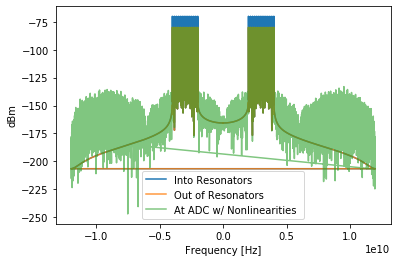

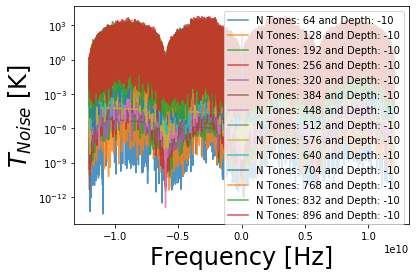

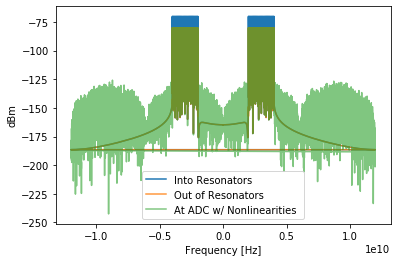

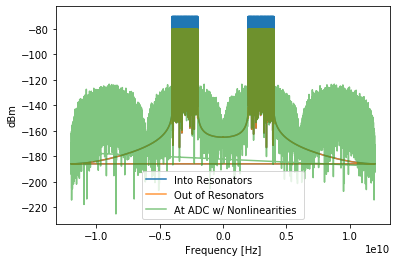

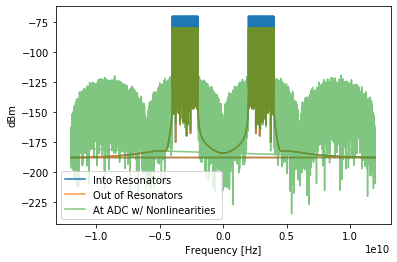

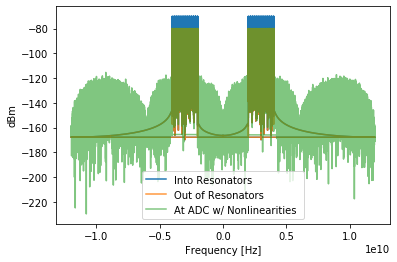

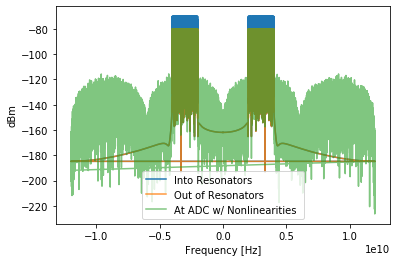

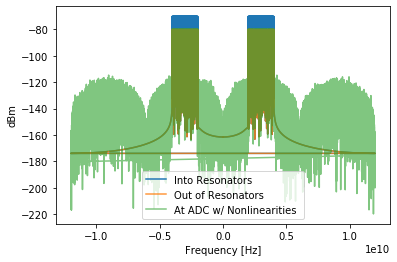

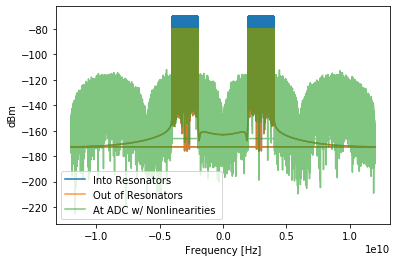

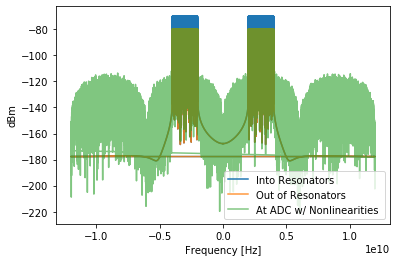

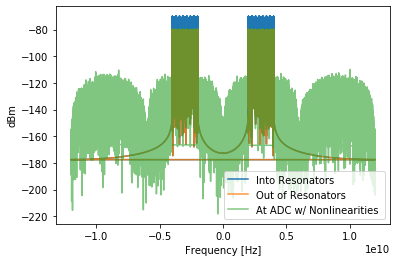

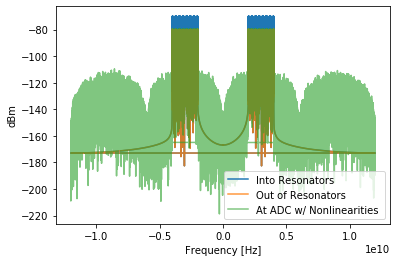

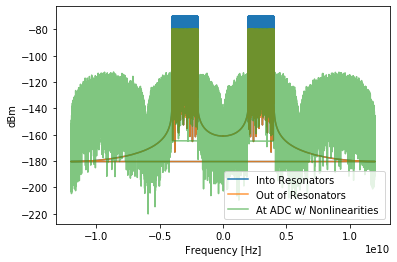

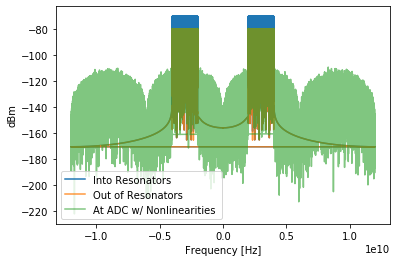

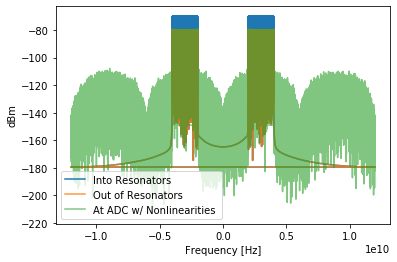

In [8]:
IIP3 = -32
Depth = -10
N_tones_sweep = np.arange(64,896+64,64)
temp_vs_ntones = []
for N_tones in N_tones_sweep:
    print(f'Generating Comb for {N_tones} tones')
    Qrs, Qcs, f_res, t, f, V_wave_in, V_wave_out = pn.Gen_Fake_Comb(P_dBm = -70., 
                                                                    f_start = 2e9, f_stop = 4e9, 
                                                                    N_Tones = N_tones,
                                                                    separation_scatter = 0, 
                                                                    BW = 100e3,BW_scatter = 0,
                                                                    Depth = Depth, Depth_Scatter = 0, 
                                                                    T = 0.0001)
    
    print(f'Calc nonlinearities for {N_tones} tones')
    outdict = pn.Calc_Non_Linearities(V_wave_in,V_wave_out,t,f,
                                 fres = f_res,
                                 Gain = 40, IIP3 = IIP3, 
                                 plot_all = True,
                                 plot_noise_temp = True, 
                                 label = f'N Tones: {N_tones} and Depth: {Depth}',
                                 alpha = 0.8, fig_num = 2)
    
    f_plot = outdict['ADC']['f_WperHz']
    T_plot = outdict['ADC']['K']
    f_plot = f_plot[:len(f_plot)//2]
    T_plot = T_plot[:len(T_plot)//2]
    #fplot2 = f_plot[np.where((f_plot < 2e9) | (f_plot > 4e9+100000) & (f_plot <6e9))[0]]
    #Tplot2 = T_plot[np.where((f_plot < 2e9) | (f_plot > 4e9+100000) & (f_plot <6e9))[0]]
    fplot3 = f_plot[np.where((f_plot > 2e9) & (f_plot < 4e9+100000))[0]]
    Tplot3 = T_plot[np.where((f_plot > 2e9) & (f_plot < 4e9+100000))[0]]
    #fit = np.polyfit(fplot2,Tplot2,14)
    #print(f'Noise from polyfit for {N_tones} tones: {np.mean(np.poly1d(fit)(f_res))} K')
    print(f'Noise from min for {N_tones} tones: {np.mean(Tplot3)} K')
    temp_vs_ntones.append(np.mean(Tplot3))
plt.plot(N_tones_sweep,temp_vs_ntones)

In [10]:
temp_vs_ntones

[0.03290396266574043,
 0.31219326180477047,
 1.2781628858539884,
 2.3089959908478,
 5.596343032470004,
 8.210247222007641,
 11.459807981597596,
 20.191284162107884,
 25.460327855915047,
 35.269676150500544,
 52.67839625162973,
 53.13840241673919,
 73.9119178326278,
 98.17035772463126]

In [ ]:
plt.plot(outdict['ADC']['f'],outdict['ADC']['dBm']-outdict['ADC']['Gain_nl'])
plt.plot(outdict['Out']['f'],outdict['Out']['dBm'],alpha = 0.6)

In [ ]:
%matplotlib inline
plt.plot(outdict['ADC']['f'],outdict['ADC']['dBm']-outdict['ADC']['Gain_nl']-outdict['Out']['dBm'])
plt.xlim(1e9,5e9)
plt.ylim(0,1)

In [ ]:
Z0 = 50
ADC_vpk = np.sqrt(2)*np.sqrt(Z0*0.001*(10**(outdict['ADC']['dBm']/10)))
Vout_vpk = np.sqrt(2)*np.sqrt(Z0*0.001*(10**(outdict['Out']['dBm']/10)))
Gain_nl_lin = 10**(outdict['ADC']['Gain_nl']/20)
ADC_vpk_ref = ADC_vpk/Gain_nl_lin

plt.plot(outdict['ADC']['f'], ADC_vpk_ref)
plt.plot(outdict['Out']['f'], Vout_vpk)

plt.figure()
plt.plot(outdict['ADC']['f'], ADC_vpk_ref-Vout_vpk)

In [1]:
temp_vs_ntones

NameError: name 'temp_vs_ntones' is not defined

In [12]:
N = [64,128,192,256,320,384,448,512,576,640,704,768,832,896]
#IIP3 = -30
Tnoise32 = [0.03290396266574043,
 0.31219326180477047,
 1.2781628858539884,
 2.3089959908478,
 5.596343032470004,
 8.210247222007641,
 11.459807981597596,
 20.191284162107884,
 25.460327855915047,
 35.269676150500544,
 52.67839625162973,
 53.13840241673919,
 73.9119178326278,
 98.17035772463126]

#IIP3 = -30
Tnoise30 = [0.0126,0.1296,0.4090,1.2779,1.6602,2.9573,5.8718,7.6909,10.0596,16.5446,20.0837,24.4345,29.6049,39.9558]

#IIP3 = -28
Tnoise28 = [0.0044,0.0496,0.1712,0.3831,1.1018,1.3892,1.8082,2.7870,4.7698,6.5005,8.4187,10.5870,12.6549,15.558]
            
#IIP3 = -26
Tnoise26 = [0.0020,0.0186,0.06,0.1914,0.2718,0.4782,0.6981,1.0792,1.7993,2.3132,2.8455,3.9668,5.2900,5.9217]

In [13]:
from scipy.optimize import curve_fit
def nl_fit_fn(x,a):
    return a*x**3

popt32, _ = curve_fit(nl_fit_fn,N,Tnoise32)
popt30, _ = curve_fit(nl_fit_fn,N,Tnoise30)
popt28, _ = curve_fit(nl_fit_fn,N,Tnoise28)
popt26, _ = curve_fit(nl_fit_fn,N,Tnoise26)

In [40]:
1e-12*1e-9

1.0000000000000001e-21

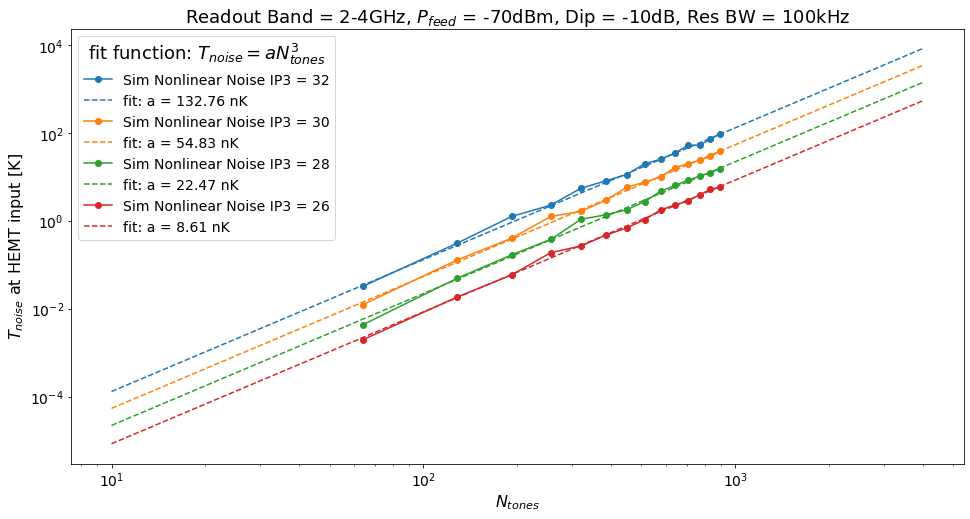

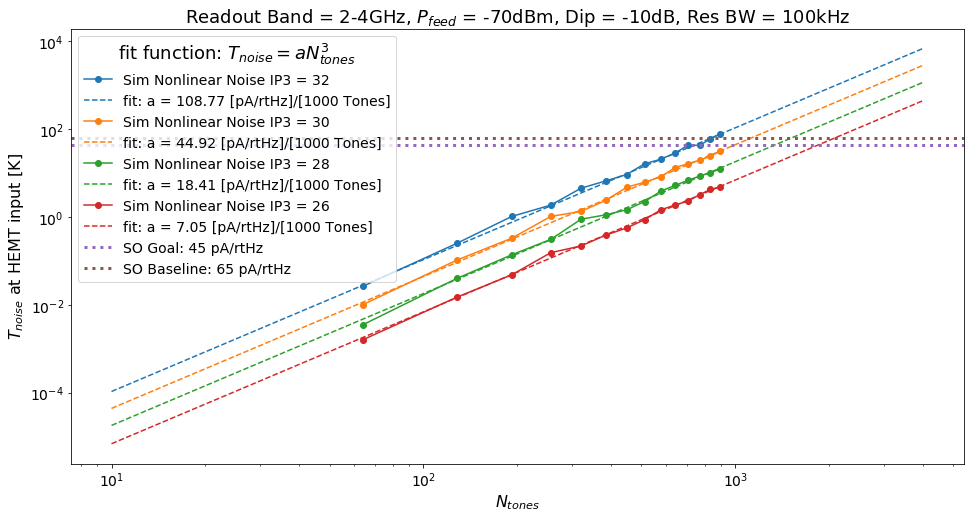

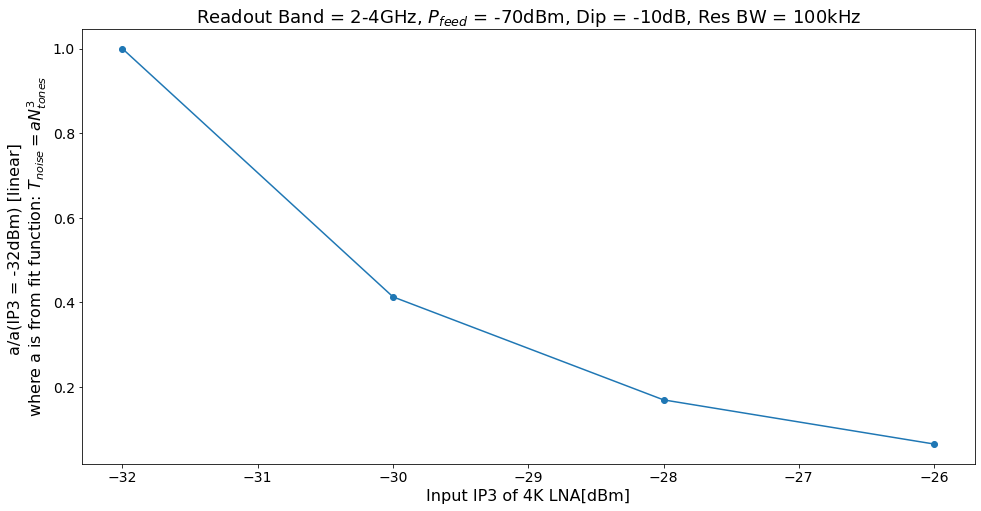

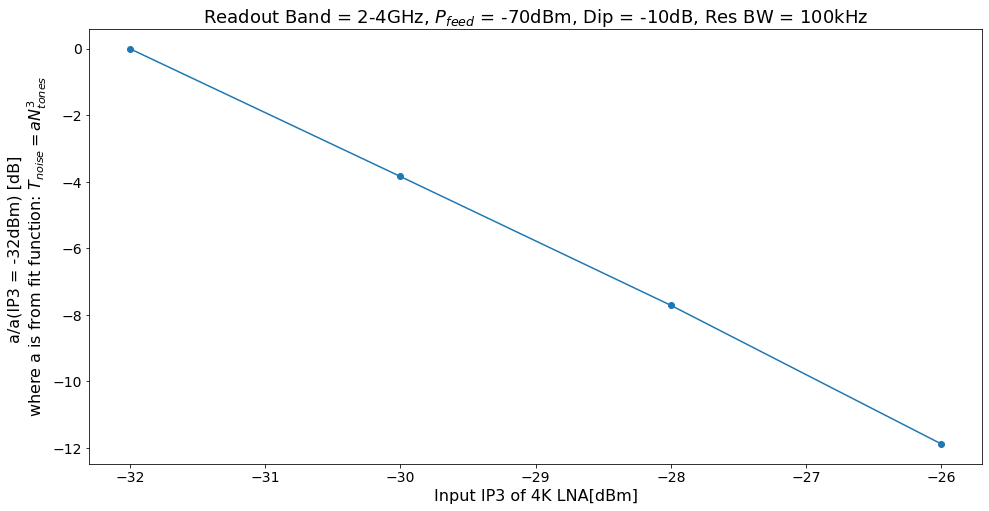

In [51]:
T_Noise_to_NEI = 0.8193112903011588

nplot = np.linspace(10,4000,100)
plt.figure(figsize = (16,8))
plt.loglog(N,Tnoise32,'o-',color = 'C0',label = 'Sim Nonlinear Noise IP3 = 32')
plt.loglog(nplot,popt32[0]*nplot**3,'--',color = 'C0',label = f'fit: a = {np.round(popt32[0]/1e-9,2)} nK')
plt.loglog(N,Tnoise30,'o-',color = 'C1',label = 'Sim Nonlinear Noise IP3 = 30')
plt.loglog(nplot,popt30[0]*nplot**3,'--',color = 'C1',label = f'fit: a = {np.round(popt30[0]/1e-9,2)} nK')
plt.loglog(N,Tnoise28,'o-',color = 'C2',label = 'Sim Nonlinear Noise IP3 = 28')
plt.loglog(nplot,popt28[0]*nplot**3,'--',color = 'C2',label = f'fit: a = {np.round(popt28[0]/1e-9,2)} nK')
plt.loglog(N,Tnoise26,'o-',color = 'C3',label = 'Sim Nonlinear Noise IP3 = 26')
plt.loglog(nplot,popt26[0]*nplot**3,'--',color = 'C3',label = f'fit: a = {np.round(popt26[0]/1e-9,2)} nK')
plt.xlabel('$N_{tones}$',fontsize = 16)
plt.ylabel('$T_{noise}$ at HEMT input [K]', fontsize = 16)
plt.legend(loc = 'upper left', title = 'fit function: $T_{noise} = aN_{tones}^3$',fontsize = 14,title_fontsize = 18)
plt.title('Readout Band = 2-4GHz, $P_{feed}$ = -70dBm, Dip = -10dB, Res BW = 100kHz',fontsize = 18)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.savefig('/home/msilvafe/Pictures/noise_vs_ntones_and_IP3_Kelvin.png')

plt.figure(figsize = (16,8))
plt.loglog(N,T_Noise_to_NEI*np.asarray(Tnoise32),'o-',color = 'C0',label = 'Sim Nonlinear Noise IP3 = 32')
plt.loglog(nplot,T_Noise_to_NEI*popt32[0]*nplot**3,'--',color = 'C0',label = f'fit: a = {np.round(T_Noise_to_NEI*popt32[0]/1e-9,2)} [pA/rtHz]/[1000 Tones]')
plt.loglog(N,T_Noise_to_NEI*np.asarray(Tnoise30),'o-',color = 'C1',label = 'Sim Nonlinear Noise IP3 = 30')
plt.loglog(nplot,T_Noise_to_NEI*popt30[0]*nplot**3,'--',color = 'C1',label = f'fit: a = {np.round(T_Noise_to_NEI*popt30[0]/1e-9,2)} [pA/rtHz]/[1000 Tones]')
plt.loglog(N,T_Noise_to_NEI*np.asarray(Tnoise28),'o-',color = 'C2',label = 'Sim Nonlinear Noise IP3 = 28')
plt.loglog(nplot,T_Noise_to_NEI*popt28[0]*nplot**3,'--',color = 'C2',label = f'fit: a = {np.round(T_Noise_to_NEI*popt28[0]/1e-9,2)} [pA/rtHz]/[1000 Tones]')
plt.loglog(N,T_Noise_to_NEI*np.asarray(Tnoise26),'o-',color = 'C3',label = 'Sim Nonlinear Noise IP3 = 26')
plt.loglog(nplot,T_Noise_to_NEI*popt26[0]*nplot**3,'--',color = 'C3',label = f'fit: a = {np.round(T_Noise_to_NEI*popt26[0]/1e-9,2)} [pA/rtHz]/[1000 Tones]')
plt.axhline(45,label = 'SO Goal: 45 pA/rtHz',color = 'C4',ls = ':',lw = 3)
plt.axhline(65,label = 'SO Baseline: 65 pA/rtHz',color = 'C5',ls = ':',lw = 3)
plt.xlabel('$N_{tones}$',fontsize = 16)
plt.ylabel('$T_{noise}$ at HEMT input [K]', fontsize = 16)
plt.legend(loc = 'upper left', title = 'fit function: $T_{noise} = aN_{tones}^3$',fontsize = 14,title_fontsize = 18)
plt.title('Readout Band = 2-4GHz, $P_{feed}$ = -70dBm, Dip = -10dB, Res BW = 100kHz',fontsize = 18)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.savefig('/home/msilvafe/Pictures/noise_vs_ntones_and_IP3_NEI.png')


plt.figure(figsize = (16,8))
plt.plot([-32,-30,-28,-26], np.asarray([popt32[0], popt30[0],popt28[0],popt26[0]])/popt32[0],'o-')
plt.xlabel('Input IP3 of 4K LNA[dBm]',fontsize = 16)
plt.ylabel('a/a(IP3 = -32dBm) [linear] \nwhere a is from fit function: $T_{noise} = aN_{tones}^3$', fontsize = 16)
plt.title('Readout Band = 2-4GHz, $P_{feed}$ = -70dBm, Dip = -10dB, Res BW = 100kHz',fontsize = 18)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.savefig('/home/msilvafe/Pictures/noise_vs_IP3_linear.png')

plt.figure(figsize = (16,8))
plt.plot([-32, -30,-28,-26], 10*np.log10(np.asarray([popt32[0], popt30[0],popt28[0],popt26[0]])/popt32[0]),'o-')
plt.xlabel('Input IP3 of 4K LNA[dBm]',fontsize = 16)
plt.ylabel('a/a(IP3 = -32dBm) [dB] \nwhere a is from fit function: $T_{noise} = aN_{tones}^3$', fontsize = 16)
plt.title('Readout Band = 2-4GHz, $P_{feed}$ = -70dBm, Dip = -10dB, Res BW = 100kHz',fontsize = 18)
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
plt.savefig('/home/msilvafe/Pictures/noise_vs_IP3_dB.png')

In [49]:
np.log10(1e3**3)

9.0